# Node-Level Measures

## Degree Centrality

In [1]:
import zipfile
import os
import networkx as nx

# Define the path to the uploaded ZIP file
#zip_path = "/mnt/data/7647000.zip"
extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"


# Extract the ZIP file
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)

# List extracted contents to verify
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

extracted_files


['C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t1.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_1.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_10.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_2.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_3.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_4.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_5.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_6.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_7.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_8.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t11_9.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t2.csv',
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Edges_t6.csv',
 'C:\\Users\\utente\\Documents\\G

In [2]:
import pandas as pd

# Load all node files and check for missing values
node_files = [f for f in extracted_files if "Nodes" in f]
missing_info_summary = {}

for file in node_files:
    df = pd.read_csv(file)
    missing_counts = df.isnull().sum()
    if missing_counts.any():
        missing_info_summary[file] = missing_counts[missing_counts > 0]

missing_info_summary


c:\Users\utente\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Nodes_t1.csv': prosocial    54
 crttotal     78
 dtype: int64,
 'C:\\Users\\utente\\Documents\\GitHub\\SNA_25\\dataset\\Nodes_t2.csv': prosocial    35
 crttotal     36
 dtype: int64}

In [3]:
# Inspect a sample node file to check column names
sample_node_file = node_files[0]
sample_node_df = pd.read_csv(sample_node_file)
sample_node_df.columns


Index(['Unnamed: 0', 'ID', 'Curso', 'Grupo', 'Sexo', 'prosocial', 'crttotal'], dtype='object')

In [4]:
import os
import pandas as pd
import networkx as nx

extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"  # or use "/mnt/data/..." on Linux

in_out_centrality_summary = {}

# Get all edge files in the directory
extracted_files = [
    os.path.join(extract_path, f)
    for f in os.listdir(extract_path)
    if f.startswith("Edges_") and f.endswith(".csv")
]

for edge_file in extracted_files:
    school_id = os.path.basename(edge_file).replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col:
            continue

        # Ensure required edge columns are present
        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute in-degree and out-degree centrality
        in_deg = nx.in_degree_centrality(G)
        out_deg = nx.out_degree_centrality(G)

        # Compute summaries
        top_in = sorted(in_deg.items(), key=lambda x: x[1], reverse=True)[:3]
        top_out = sorted(out_deg.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_in = sum(in_deg.values()) / len(in_deg) if in_deg else 0
        mean_out = sum(out_deg.values()) / len(out_deg) if out_deg else 0

        in_out_centrality_summary[school_id] = {
            "mean_in_degree": mean_in,
            "mean_out_degree": mean_out,
            "top_3_in_degree": top_in,
            "top_3_out_degree": top_out
        }

    except Exception as e:
        in_out_centrality_summary[school_id] = {
            "error": str(e)
        }

in_out_df = pd.DataFrame.from_dict(in_out_centrality_summary, orient='index')
#in_out_df.round(3)


In [5]:
def round_tuple_list(lst, decimals=3):
    return [(a, round(b, decimals)) for a, b in lst]

# Apply rounding to specific columns
in_out_df['top_3_in_degree'] = in_out_df['top_3_in_degree'].apply(lambda x: round_tuple_list(x, 3))
in_out_df['top_3_out_degree'] = in_out_df['top_3_out_degree'].apply(lambda x: round_tuple_list(x, 3))

# Optional: round the numeric columns too
in_out_df = in_out_df.round(3)

# Print the result
in_out_df


,mean_in_degree,mean_out_degree,top_3_in_degree,top_3_out_degree
t1,0.044,0.044,"[(463, 0.118), (485, 0.103), (429, 0.1)]","[(392, 0.346), (558, 0.162), (395, 0.154)]"
t11_1,0.047,0.047,"[(3499, 0.345), (3787, 0.162), (3678, 0.128)]","[(3676, 0.266), (3722, 0.231), (3551, 0.207)]"
t11_10,0.023,0.023,"[(5142, 0.28), (5235, 0.066), (5234, 0.059)]","[(5235, 0.165), (5216, 0.134), (5504, 0.115)]"
t11_2,0.018,0.018,"[(4118, 0.219), (4445, 0.058), (4454, 0.058)]","[(4360, 0.218), (4340, 0.159), (4290, 0.102)]"
t11_3,0.062,0.062,"[(4824, 0.211), (5043, 0.196), (5138, 0.139)]","[(4835, 0.253), (5059, 0.232), (5100, 0.211)]"
t11_4,0.076,0.076,"[(4921, 0.429), (4964, 0.143), (4969, 0.134)]","[(4943, 0.244), (4963, 0.235), (4929, 0.193)]"
t11_5,0.053,0.053,"[(3370, 0.224), (3484, 0.131), (3369, 0.11)]","[(3314, 0.18), (3311, 0.171), (2056, 0.163)]"
t11_6,0.089,0.089,"[(2537, 0.222), (2538, 0.194), (2561, 0.194)]","[(2530, 0.403), (2615, 0.361), (2534, 0.333)]"
t11_7,0.091,0.091,"[(3059, 0.184), (3084, 0.184), (3095, 0.175)]","[(3043, 0.408), (3061, 0.35), (3113, 0.33)]"
t11_8,0.018,0.018,"[(2297, 0.048), (2147, 0.043), (2228, 0.043)]","[(2133, 0.171), (2114, 0.168), (2135, 0.139)]"


In [6]:
sns.heatmap(in_out_df[["mean_in_degree", "mean_out_degree"]], annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Heatmap of Mean In/Out Degree Centrality")
plt.xlabel("Centrality Type")
plt.ylabel("School")
plt.show()


NameError: name 'sns' is not defined

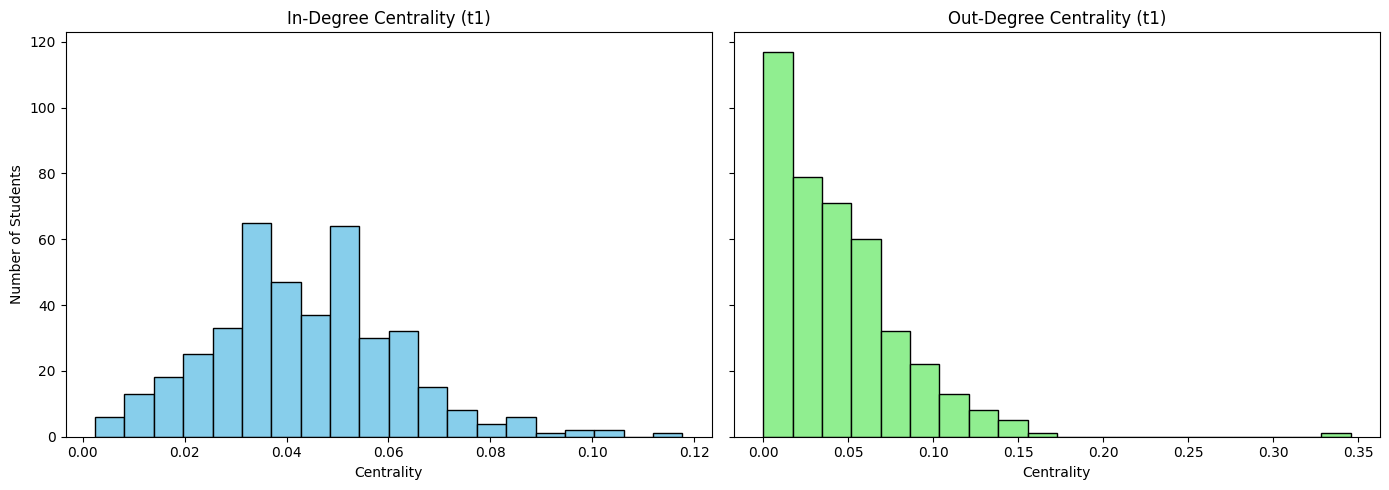

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Locate files for t1
edge_file_t1 = [f for f in extracted_files if "Edges_t1.csv" in f][0]
node_file_t1 = edge_file_t1.replace("Edges", "Nodes")

# Load data
edge_df = pd.read_csv(edge_file_t1)
node_df = pd.read_csv(node_file_t1)

# Detect ID column
id_col = None
for col in node_df.columns:
    if col.lower() == "id":
        id_col = col
        break
if not id_col and "ID" in node_df.columns:
    id_col = "ID"

# Filter for positive edges
positive_edges = edge_df[edge_df['weight'] > 0]

# Build graph
G = nx.DiGraph()
G.add_nodes_from(node_df[id_col])
G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

# Compute centrality values
in_deg_values = list(nx.in_degree_centrality(G).values())
out_deg_values = list(nx.out_degree_centrality(G).values())

# Plot side-by-side histograms with thinner bars
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].hist(in_deg_values, bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("In-Degree Centrality (t1)")
axs[0].set_xlabel("Centrality")
axs[0].set_ylabel("Number of Students")

axs[1].hist(out_deg_values, bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title("Out-Degree Centrality (t1)")
axs[1].set_xlabel("Centrality")

plt.tight_layout()
plt.show()


## Betweenness Centrality

In [7]:
# Prepare a summary dictionary for betweenness centrality
betweenness_summary = {}

# Calculate betweenness centrality for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute betweenness centrality
        btw = nx.betweenness_centrality(G, normalized=True)

        # Top 3 by betweenness and general stats
        top_3 = sorted(btw.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_btw = sum(btw.values()) / len(btw) if btw else 0
        max_btw = max(btw.values()) if btw else 0

        betweenness_summary[school_id] = {
            "mean_betweenness": mean_btw,
            "max_betweenness": max_btw,
            "top_3_students": top_3
        }

    except Exception as e:
        betweenness_summary[school_id] = {
            "error": str(e)
        }

btw_df = pd.DataFrame.from_dict(betweenness_summary, orient='index')
#btw_df


In [19]:
def round_tuple_list(lst, decimals=3):
    return [(a, round(b, decimals)) for a, b in lst]

# Apply rounding to the list of tuples in the 'top_3_students' column
btw_df['top_3_students'] = btw_df['top_3_students'].apply(
    lambda x: round_tuple_list(x, 3) if isinstance(x, list) else x
)

# Optional: round other numeric columns
btw_df = btw_df.round(5)

# Print the cleaned DataFrame
btw_df


,mean_betweenness,max_betweenness,top_3_students
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.00411,0.04099,"[(463, 0.041), (392, 0.039), (388, 0.03)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.00187,0.02456,"[(3627, 0.025), (3551, 0.02), (3769, 0.017)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.00074,0.01064,"[(5235, 0.011), (5504, 0.007), (5468, 0.006)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.00042,0.00625,"[(4360, 0.006), (4813, 0.004), (4503, 0.004)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.00274,0.02613,"[(4889, 0.026), (4871, 0.016), (4898, 0.015)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.00173,0.01015,"[(5002, 0.01), (4995, 0.01), (4963, 0.009)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.00106,0.00701,"[(3424, 0.007), (3368, 0.006), (3369, 0.005)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.00677,0.04450,"[(2530, 0.044), (2539, 0.041), (2534, 0.028)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.01156,0.10605,"[(3113, 0.106), (3132, 0.088), (3144, 0.063)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.00058,0.00663,"[(2228, 0.007), (2250, 0.007), (2227, 0.007)]"


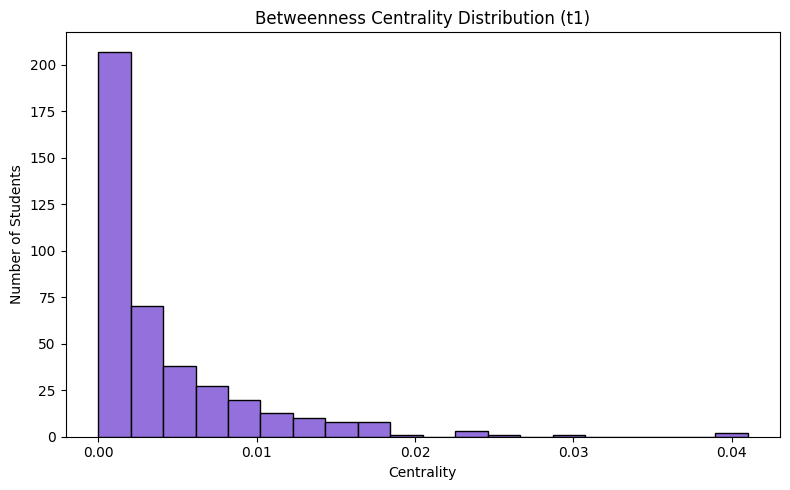

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Path setup
extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"
edge_file_t1 = [f for f in os.listdir(extract_path) if "Edges_t1.csv" in f][0]
node_file_t1 = edge_file_t1.replace("Edges", "Nodes")

# Load data
edge_df = pd.read_csv(os.path.join(extract_path, edge_file_t1))
node_df = pd.read_csv(os.path.join(extract_path, node_file_t1))

# Detect ID column
id_col = next((col for col in node_df.columns if col.lower() == "id"), None)
if not id_col:
    id_col = "ID"

# Build graph
positive_edges = edge_df[edge_df['weight'] > 0]
G = nx.DiGraph()
G.add_nodes_from(node_df[id_col])
G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

# Compute betweenness
btw = list(nx.betweenness_centrality(G, normalized=True).values())

# Plot
plt.figure(figsize=(8, 5))
plt.hist(btw, bins=20, color='mediumpurple', edgecolor='black')
plt.title("Betweenness Centrality Distribution (t1)")
plt.xlabel("Centrality")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


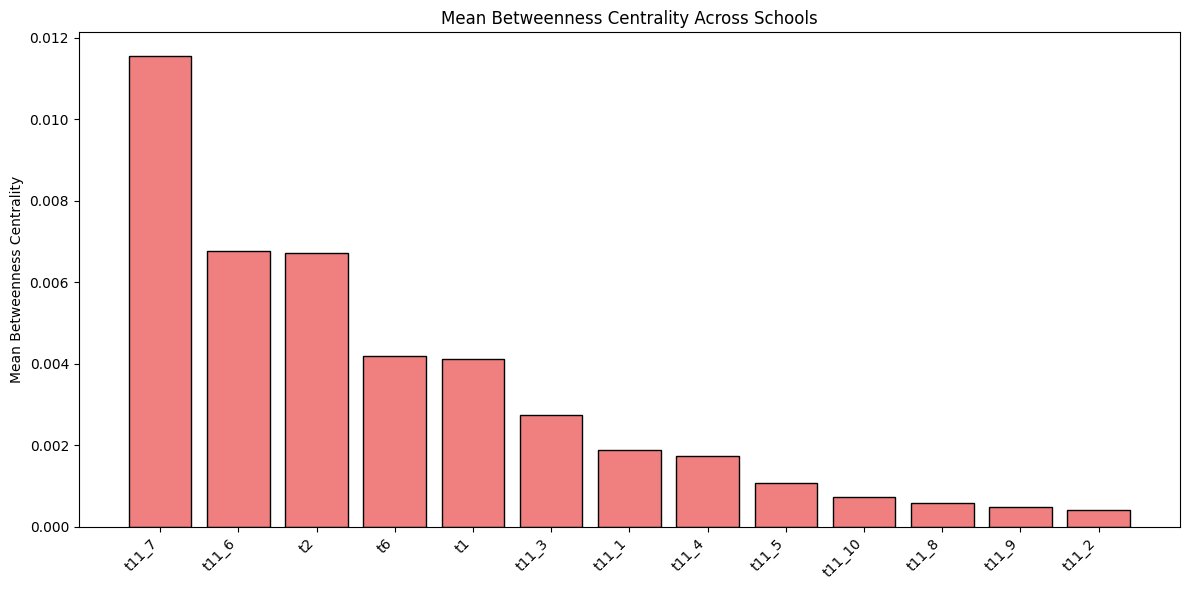

In [ ]:
school_btw_means = {}
extracted_files = [
    os.path.join(extract_path, f)
    for f in os.listdir(extract_path)
    if f.startswith("Edges_") and f.endswith(".csv")
]

for edge_file in extracted_files:
    school_id = os.path.basename(edge_file).replace("Edges_", "").replace(".csv", "")
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        id_col = next((col for col in node_df.columns if col.lower() == "id"), "ID")
        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        positive_edges = edge_df[edge_df['weight'] > 0]
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        btw = nx.betweenness_centrality(G, normalized=True)
        school_btw_means[school_id] = sum(btw.values()) / len(btw)

    except:
        continue

# Plot
sorted_schools = sorted(school_btw_means.items(), key=lambda x: x[1], reverse=True)
schools, means = zip(*sorted_schools)

plt.figure(figsize=(12, 6))
plt.bar(schools, means, color='lightcoral', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Betweenness Centrality")
plt.title("Mean Betweenness Centrality Across Schools")
plt.tight_layout()
plt.show()


## Closeness Centrality

In [21]:
# Prepare a summary dictionary for closeness centrality
closeness_summary = {}

# Calculate closeness centrality for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Compute closeness centrality
        close = nx.closeness_centrality(G)

        # Top 3 by closeness and general stats
        top_3 = sorted(close.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_close = sum(close.values()) / len(close) if close else 0
        max_close = max(close.values()) if close else 0

        closeness_summary[school_id] = {
            "mean_closeness": mean_close,
            "max_closeness": max_close,
            "top_3_students": top_3
        }

    except Exception as e:
        closeness_summary[school_id] = {
            "error": str(e)
        }

closeness_df = pd.DataFrame.from_dict(closeness_summary, orient='index')
#closeness_df


In [20]:
# Helper function to round values in the top-3 tuple list
def round_tuple_list(lst, decimals=3):
    return [(a, round(b, decimals)) for a, b in lst]

# Apply rounding to the 'top_3_students' column
closeness_df['top_3_students'] = closeness_df['top_3_students'].apply(
    lambda x: round_tuple_list(x, 5) if isinstance(x, list) else x
)

# Round numeric columns (mean_closeness, max_closeness, etc.)
closeness_df = closeness_df.round(3)

# View the result
closeness_df


,mean_closeness,max_closeness,top_3_students
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.305,0.385,"[(463, 0.38476), (412, 0.37458), (496, 0.37207)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.158,0.484,"[(3499, 0.48417), (3787, 0.23758), (3678, 0.21..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.081,0.470,"[(5142, 0.46966), (5349, 0.11341), (5235, 0.11..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.071,0.393,"[(4118, 0.39324), (4400, 0.117), (4404, 0.117)]"
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.168,0.269,"[(5043, 0.26868), (4824, 0.25449), (5111, 0.22..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.123,0.584,"[(4921, 0.58386), (4964, 0.1578), (4933, 0.157..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.107,0.391,"[(3370, 0.39059), (3484, 0.15259), (3369, 0.15..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.310,0.382,"[(2537, 0.38173), (2536, 0.37369), (2538, 0.37..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.282,0.331,"[(3108, 0.33098), (3137, 0.32794), (3132, 0.32..."
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.051,0.088,"[(2297, 0.08761), (2228, 0.08472), (2261, 0.08..."


In [22]:
# Helper function to round values in a list of (ID, score) tuples
def round_tuple_list(lst, decimals=3):
    return [(a, round(b, decimals)) for a, b in lst]

# Apply rounding to the 'top_3_students' column
closeness_df['top_3_students'] = closeness_df['top_3_students'].apply(
    lambda x: round_tuple_list(x, 5) if isinstance(x, list) else x
)

# Round numeric columns (mean_closeness, max_closeness, etc.)
closeness_df = closeness_df.round(3)

# Optional: Clean the index to remove path and leading "t"
closeness_df.index = closeness_df.index.str.extract(r'dataset\\t?(.+)$')[0]

# View the result
closeness_df


,mean_closeness,max_closeness,top_3_students
0,,,
1,0.305,0.385,"[(463, 0.38476), (412, 0.37458), (496, 0.37207)]"
11_1,0.158,0.484,"[(3499, 0.48417), (3787, 0.23758), (3678, 0.21..."
11_10,0.081,0.470,"[(5142, 0.46966), (5349, 0.11341), (5235, 0.11..."
11_2,0.071,0.393,"[(4118, 0.39324), (4400, 0.117), (4404, 0.117)]"
11_3,0.168,0.269,"[(5043, 0.26868), (4824, 0.25449), (5111, 0.22..."
11_4,0.123,0.584,"[(4921, 0.58386), (4964, 0.1578), (4933, 0.157..."
11_5,0.107,0.391,"[(3370, 0.39059), (3484, 0.15259), (3369, 0.15..."
11_6,0.310,0.382,"[(2537, 0.38173), (2536, 0.37369), (2538, 0.37..."
11_7,0.282,0.331,"[(3108, 0.33098), (3137, 0.32794), (3132, 0.32..."


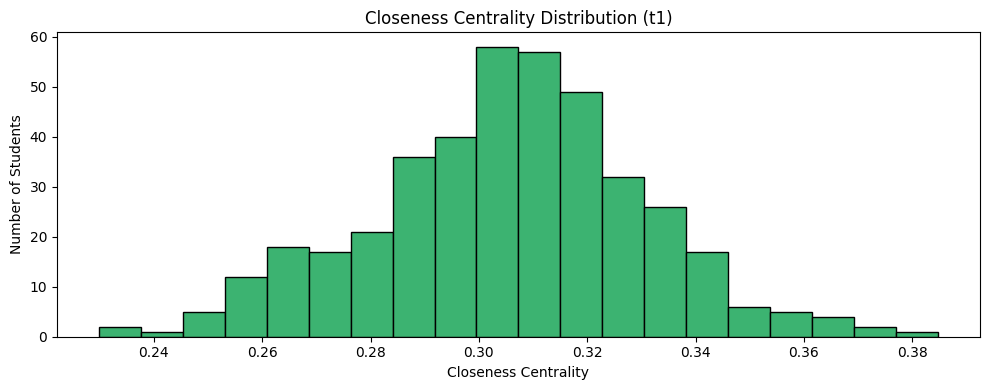

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os

# Locate files for t1
edge_file_t1 = [f for f in extracted_files if "Edges_t1.csv" in f][0]
node_file_t1 = edge_file_t1.replace("Edges", "Nodes")

# Load data
edge_df = pd.read_csv(edge_file_t1)
node_df = pd.read_csv(node_file_t1)

# Detect ID column
id_col = None
for col in node_df.columns:
    if col.lower() == "id":
        id_col = col
        break
if not id_col and "ID" in node_df.columns:
    id_col = "ID"

# Filter for positive edges
positive_edges = edge_df[edge_df['weight'] > 0]

# Build graph
G = nx.DiGraph()
G.add_nodes_from(node_df[id_col])
G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

# Compute closeness centrality
closeness_values = list(nx.closeness_centrality(G).values())

# Plot
fig, ax = plt.subplots(figsize=(10, 4))  # Wider, single row

ax.hist(closeness_values, bins=20, color='mediumseagreen', edgecolor='black')
ax.set_title("Closeness Centrality Distribution (t1)")
ax.set_xlabel("Closeness Centrality")
ax.set_ylabel("Number of Students")

plt.tight_layout()
plt.show()

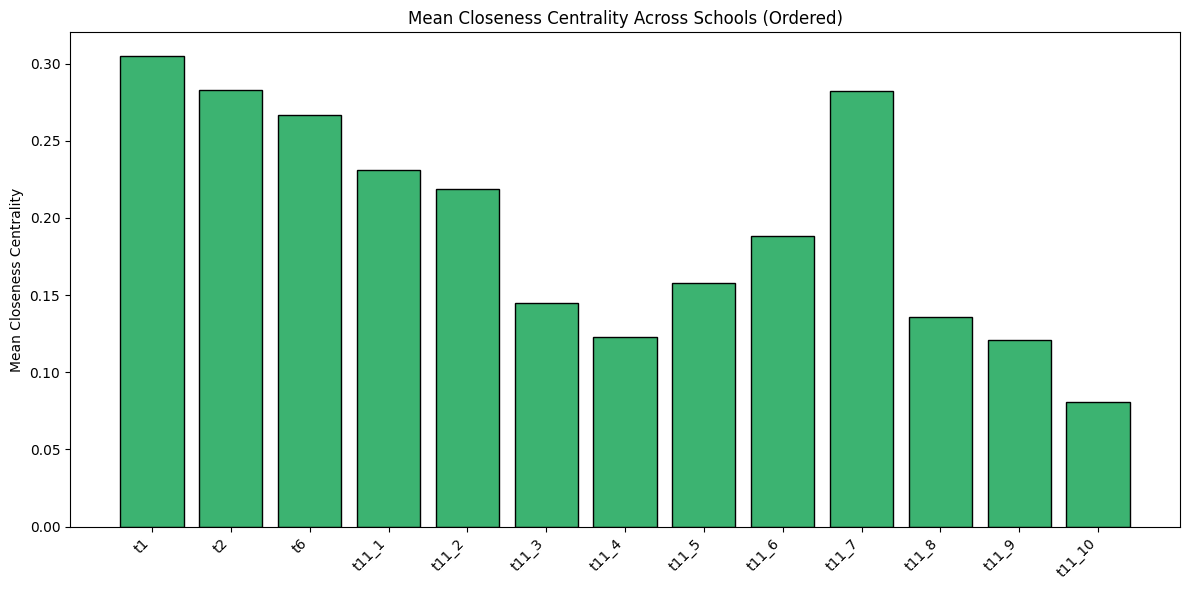

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# School display order
school_order = [
    "t1", "t2", "t6", "t11_1", "t11_2", "t11_3", "t11_4",
    "t11_5", "t11_6", "t11_7", "t11_8", "t11_9", "t11_10"
]

# Replace this dictionary with your actual `closeness_summary` results
closeness_summary = {
    "t1": {"mean_closeness": 0.305},
    "t2": {"mean_closeness": 0.283},
    "t6": {"mean_closeness": 0.267},
    "t11_1": {"mean_closeness": 0.231},
    "t11_2": {"mean_closeness": 0.219},
    "t11_3": {"mean_closeness": 0.145},
    "t11_4": {"mean_closeness": 0.123},
    "t11_5": {"mean_closeness": 0.158},
    "t11_6": {"mean_closeness": 0.188},
    "t11_7": {"mean_closeness": 0.282},
    "t11_8": {"mean_closeness": 0.136},
    "t11_9": {"mean_closeness": 0.121},
    "t11_10": {"mean_closeness": 0.081}
}

# Create DataFrame and reorder
closeness_df = pd.DataFrame.from_dict(closeness_summary, orient='index')
closeness_df = closeness_df.reindex(school_order)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(closeness_df.index, closeness_df["mean_closeness"], color='mediumseagreen', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mean Closeness Centrality")
plt.title("Mean Closeness Centrality Across Schools (Ordered)")
plt.tight_layout()
plt.show()

## Eigenvector Centrality

In [ ]:
import os
import pandas as pd
import networkx as nx

# Set your dataset directory path
extract_path = r"C:\Users\utente\Documents\GitHub\SNA_25\dataset"

# Collect all edge files
extracted_files = [
    os.path.join(extract_path, f)
    for f in os.listdir(extract_path)
    if f.startswith("Edges_") and f.endswith(".csv")
]

# Prepare a summary dictionary for eigenvector centrality
eigenvector_summary = {}

# Calculate eigenvector centrality for each school
for edge_file in extracted_files:
    school_id = os.path.basename(edge_file).replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive-weight edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Convert to undirected graph for eigenvector centrality (required by NetworkX)
        if not nx.is_connected(G.to_undirected()):
            # Get the largest strongly connected component (as a set of nodes)
            largest_component_nodes = max(nx.strongly_connected_components(G), key=len)
            # Create subgraph from those nodes
            H = G.subgraph(largest_component_nodes).copy()
        else:
            H = G

        # Compute eigenvector centrality 
        eig = nx.eigenvector_centrality(H, max_iter=1000)

        # Top 3 by eigenvector centrality and summary stats
        top_3 = sorted(eig.items(), key=lambda x: x[1], reverse=True)[:3]
        mean_eig = sum(eig.values()) / len(eig) if eig else 0
        max_eig = max(eig.values()) if eig else 0

        eigenvector_summary[school_id] = {
            "mean_eigenvector": mean_eig,
            "max_eigenvector": max_eig,
            "top_3_students": top_3
        }

    except Exception as e:
        eigenvector_summary[school_id] = {
            "mean_eigenvector": None,
            "max_eigenvector": None,
            "top_3_students": None,
            "error": str(e)
        }

# Convert summary dictionary to DataFrame
eigenvector_df = pd.DataFrame.from_dict(eigenvector_summary, orient='index')
eigenvector_df


,mean_eigenvector,max_eigenvector,top_3_students
t1,0.040535,0.152674,"[(463, 0.15267367956361158), (495, 0.145327102..."
t11_1,0.034441,0.236777,"[(3787, 0.23677682473540482), (3499, 0.1962151..."
t11_10,0.020956,0.239055,"[(5235, 0.23905450182456786), (5234, 0.2211053..."
t11_2,0.016570,0.180381,"[(4454, 0.18038139986007956), (4445, 0.1791732..."
t11_3,0.083704,0.274340,"[(5131, 0.274340008417419), (5123, 0.248420411..."
t11_4,0.041495,0.292373,"[(4964, 0.29237344538162213), (4961, 0.2848544..."
t11_5,0.116861,0.227620,"[(3369, 0.2276203682263174), (3344, 0.22660227..."
t11_6,0.070194,0.200473,"[(2537, 0.2004730857592621), (2561, 0.18005707..."
t11_7,0.080454,0.250284,"[(3059, 0.25028381495323465), (3068, 0.2383675..."
t11_8,0.103983,0.255747,"[(2228, 0.2557465361268774), (2208, 0.24861378..."


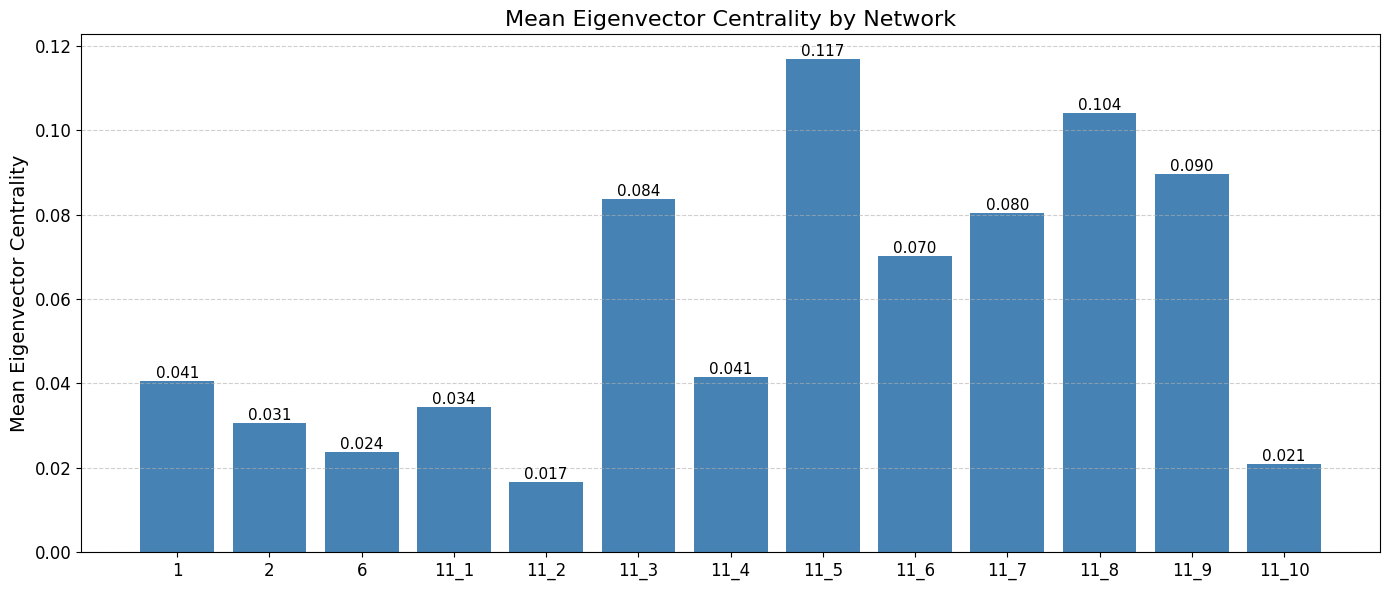

In [ ]:
import matplotlib.pyplot as plt

# Mapping from internal IDs to display names 
rename_map = {
    "t1": "1",
    "t2": "2",
    "t6": "6",
    "t11_1": "11_1",
    "t11_2": "11_2",
    "t11_3": "11_3",
    "t11_4": "11_4",
    "t11_5": "11_5",
    "t11_6": "11_6",
    "t11_7": "11_7",
    "t11_8": "11_8",
    "t11_9": "11_9",
    "t11_10": "11_10"
}

# Desired order for plotting
plot_order = ["1", "2", "6", "11_1", "11_2", "11_3", "11_4", "11_5", "11_6", "11_7", "11_8", "11_9", "11_10"]

# Rename the index of your DataFrame to match desired plotting labels
eigenvector_df_renamed = eigenvector_df.rename(index=rename_map)

# Reindex to match the desired order  
plot_df = eigenvector_df_renamed.loc[plot_order] 

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(plot_df.index, plot_df['mean_eigenvector'], color='steelblue')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Mean Eigenvector Centrality', fontsize=14)
plt.title('Mean Eigenvector Centrality by Network', fontsize=16) 
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.3f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


# Network-Level Structure and Cohesion Measures

## Density

In [ ]:
# Prepare a summary dictionary for network density
density_summary = {}

# Calculate density for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges only
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Calculate density
        density = nx.density(G)

        # Record number of nodes and edges for context
        density_summary[school_id] = {
            "density": density,
            "num_nodes": G.number_of_nodes(),
            "num_edges": G.number_of_edges()
        }

    except Exception as e:
        density_summary[school_id] = {
            "error": str(e)
        }

density_df = pd.DataFrame.from_dict(density_summary, orient='index')
density_df


,density,num_nodes,num_edges
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,0.043758,409,7302
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,0.047257,291,3988
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,0.022922,455,4735
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,0.017608,686,8274
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,0.061697,195,2334
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,0.076401,120,1091
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,0.052995,246,3194
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,0.089080,145,1860
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,0.091486,104,980
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,0.018021,376,2541


In [ ]:
# Clean up and sort the DataFrame
density_df_clean = density_df.copy()
density_df_clean.index = density_df_clean.index.str.extract(r'dataset\\(.*)')[0]
density_df_clean = density_df_clean.sort_values(by='density', ascending=False)
density_df_clean


,density,num_nodes,num_edges
0,,,
t11_7,0.091486,104,980
t11_6,0.089080,145,1860
t11_4,0.076401,120,1091
t11_3,0.061697,195,2334
t2,0.060224,238,3397
t11_5,0.052995,246,3194
t11_1,0.047257,291,3988
t1,0.043758,409,7302
t6,0.038732,534,11024


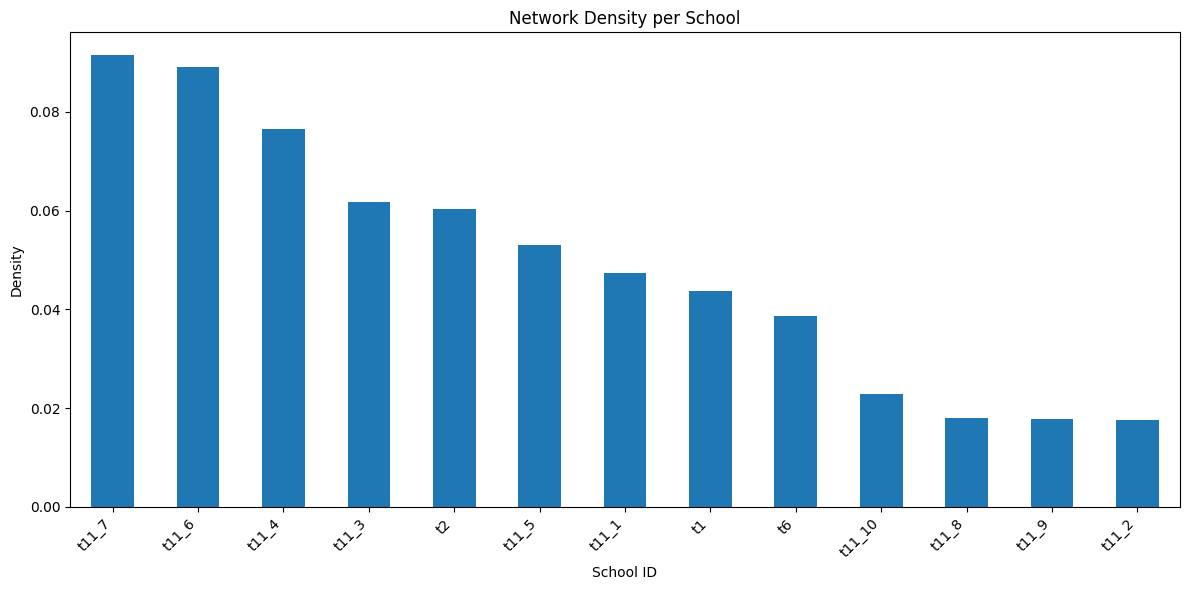

In [ ]:
import matplotlib.pyplot as plt

density_df_clean.plot(kind='bar', y='density', figsize=(12, 6), legend=False)
plt.title("Network Density per School")
plt.ylabel("Density")
plt.xlabel("School ID")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


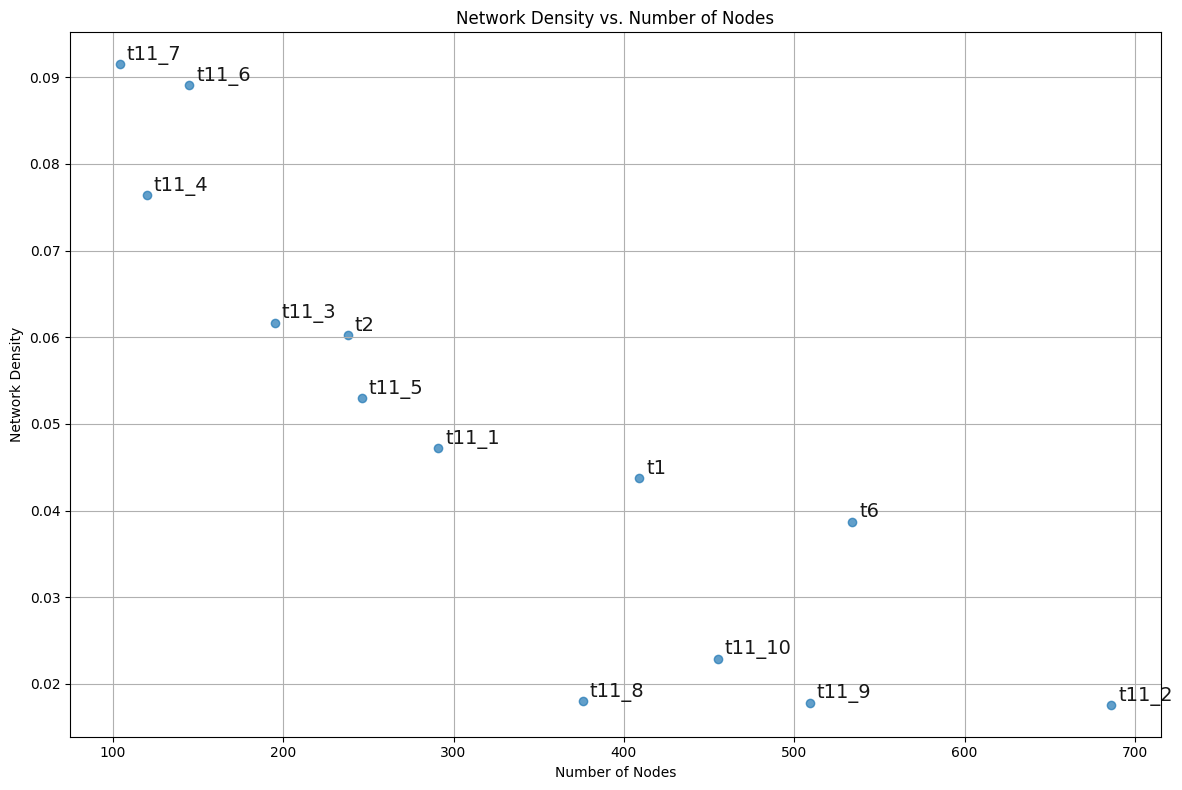

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean the index to just the network ID like 't1', 't11_1', etc.
density_df_clean = density_df.copy()
density_df_clean.index = density_df_clean.index.str.extract(r'dataset\\(.*)')[0]

plt.figure(figsize=(12, 8))
plt.scatter(density_df_clean['num_nodes'], density_df_clean['density'], alpha=0.7)
plt.title("Network Density vs. Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Network Density")

# Annotate all points with the network code only
for school_id, row in density_df_clean.iterrows():
    plt.annotate(school_id,
                 (row['num_nodes'], row['density']),
                 textcoords="offset points",
                 xytext=(5, 3),
                 ha='left',
                 fontsize=14,  # 9 * 1.5 = 13.5 rounded to 14
                 alpha=0.9)

plt.grid(True)
plt.tight_layout()
plt.show()


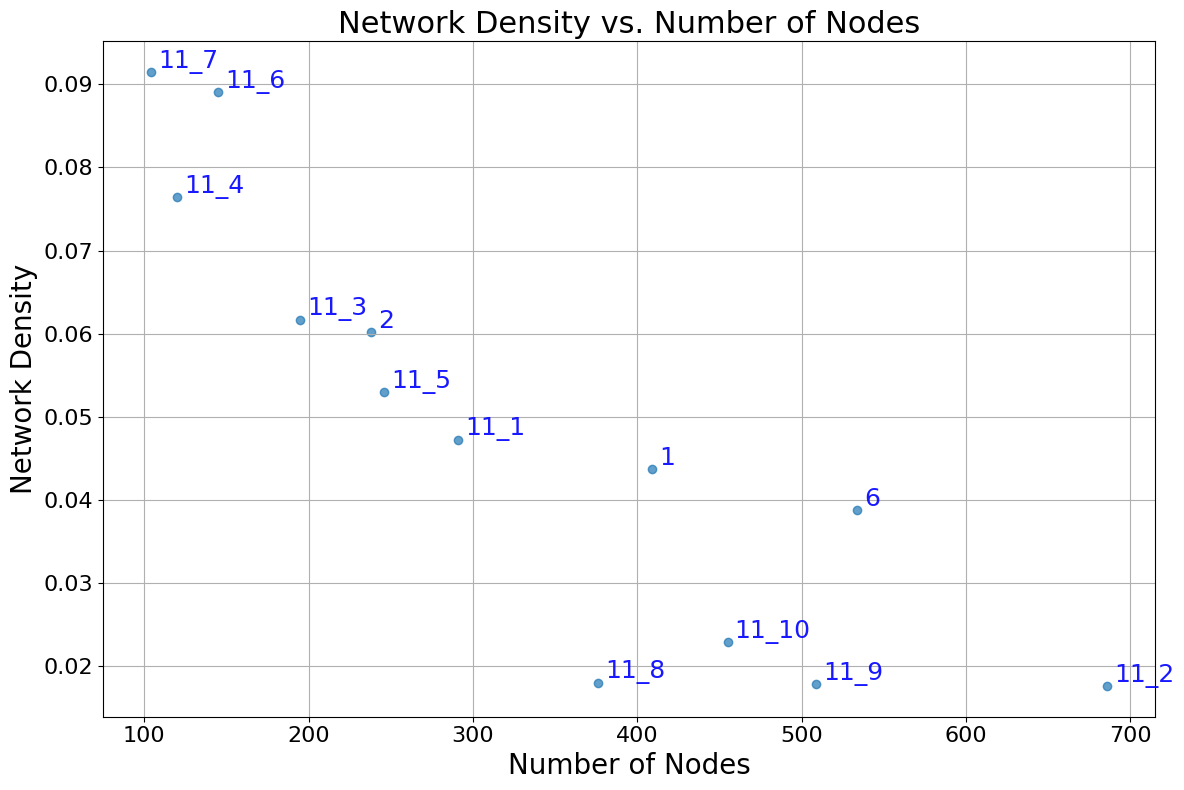

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set label font size
label_fontsize = 18

# Clean the index to just the network ID like 't1', 't11_1', etc.
density_df_clean = density_df.copy()
density_df_clean.index = density_df_clean.index.str.extract(r'dataset\\(.*)')[0]

plt.figure(figsize=(12, 8))
plt.scatter(density_df_clean['num_nodes'], density_df_clean['density'], alpha=0.7)
plt.title("Network Density vs. Number of Nodes", fontsize=label_fontsize + 4)
plt.xlabel("Number of Nodes", fontsize=label_fontsize + 2)
plt.ylabel("Network Density", fontsize=label_fontsize + 2)

# Annotate all points with only the number part (strip leading 't')
for school_id, row in density_df_clean.iterrows():
    label = school_id.lstrip('t')  # Remove leading 't' if present
    plt.annotate(label,
                 (row['num_nodes'], row['density']),
                 textcoords="offset points",
                 xytext=(5, 3),
                 ha='left',
                 fontsize=label_fontsize,
                 color='blue',  # Make labels blue if desired
                 alpha=0.9)

plt.grid(True)
plt.tick_params(labelsize=label_fontsize - 2)
plt.tight_layout()
plt.show()


### General graph with all Node Level measures

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Font size multiplier
FONT_SIZE_MULTIPLIER = 2.0

# Clean and rename columns for consistency
in_out_df_clean = in_out_df.dropna(subset=['mean_in_degree', 'mean_out_degree'])

btw_df_clean = (
    btw_df.drop(columns=['error'], errors='ignore')
    .dropna(subset=['Betweenness Centrality'])
    .rename(columns={'Betweenness Centrality': 'Betweenness'})
)

closeness_df_clean = (
    closeness_df.drop(columns=['error'], errors='ignore')
    .dropna(subset=['Closeness Centrality'])
    .rename(columns={'Closeness Centrality': 'Closeness'})
)

eigenvector_df_clean = (
    eigenvector_df.drop(columns=['error'], errors='ignore')
    .dropna(subset=['Eigenvector Centrality'])
    .rename(columns={'Eigenvector Centrality': 'Eigenvector'})
)

# Find common school IDs
common_ids = (
    set(in_out_df_clean.index)
    & set(btw_df_clean.index)
    & set(closeness_df_clean.index)
    & set(eigenvector_df_clean.index)
)
common_ids = sorted(common_ids)

# Build combined DataFrame
combined_df = pd.DataFrame(index=common_ids)
combined_df['Degree'] = (
    in_out_df_clean.loc[common_ids]['mean_in_degree'] +
    in_out_df_clean.loc[common_ids]['mean_out_degree']
) / 2
combined_df['Betweenness'] = btw_df_clean.loc[common_ids]['Betweenness']
combined_df['Closeness'] = closeness_df_clean.loc[common_ids]['Closeness']
combined_df['Eigenvector'] = eigenvector_df_clean.loc[common_ids]['Eigenvector']

# Shorten x-axis labels (remove leading "t" if present)
x_labels = [label[1:] if label.startswith('t') else label for label in combined_df.index]

# Plotting
plt.figure(figsize=(14, 7))
label_fontsize = int(12 * FONT_SIZE_MULTIPLIER)
title_fontsize = int(16 * FONT_SIZE_MULTIPLIER)
legend_fontsize = int(12 * FONT_SIZE_MULTIPLIER)

x = range(len(combined_df))
width = 0.2
columns = combined_df.columns
shifts = [width * (i - (len(columns) - 1)/2) for i in range(len(columns))]

# Plot each centrality
for i, col in enumerate(columns):
    plt.bar(
        [pos + shifts[i] for pos in x],
        combined_df[col],
        width=width,
        label=col + " Centrality"
    )

plt.xticks(x, x_labels, rotation=45, fontsize=label_fontsize)
plt.ylabel("Average Centrality", fontsize=label_fontsize + 2)
plt.title("Average Centralities Across Schools", fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: ['Betweenness Centrality']

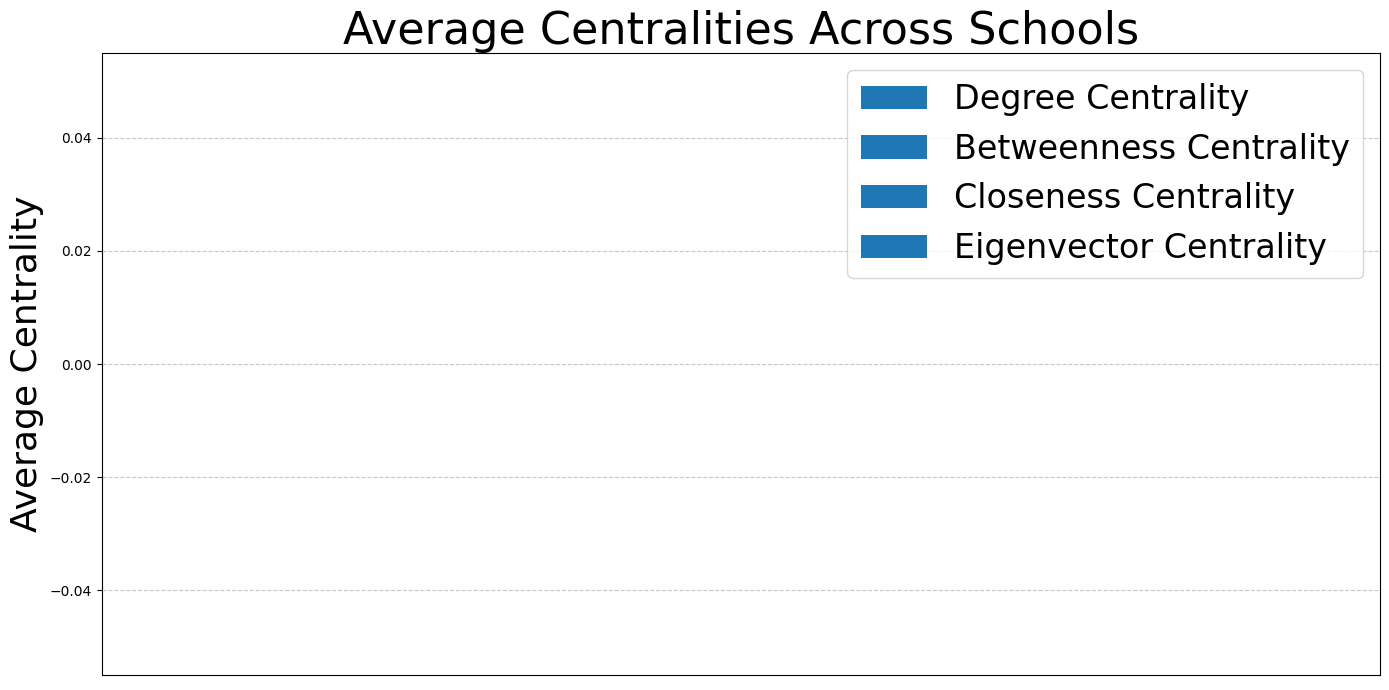

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Font size multiplier
FONT_SIZE_MULTIPLIER = 2.0

# Normalize school IDs: lowercase, strip whitespace, remove leading 't' if present
def normalize_ids(idx):
    idx = idx.astype(str).str.strip().str.lower()
    idx = idx.str.lstrip('t')
    return idx

# Clean and rename columns with consistent names, then dropna on those columns

# Degree centrality dataframe
in_out_df_clean = in_out_df.dropna(subset=['mean_in_degree', 'mean_out_degree'])
in_out_df_clean.index = normalize_ids(in_out_df_clean.index.to_series())

# Betweenness centrality
btw_df_clean = btw_df.rename(columns={'mean_betweenness': 'Betweenness'})
btw_df_clean = btw_df_clean.drop(columns=['error'], errors='ignore')
btw_df_clean = btw_df_clean.dropna(subset=['Betweenness'])
btw_df_clean.index = normalize_ids(btw_df_clean.index.to_series())

# Closeness centrality
closeness_df_clean = closeness_df.rename(columns={'mean_closeness': 'Closeness'})
closeness_df_clean = closeness_df_clean.drop(columns=['error'], errors='ignore')
closeness_df_clean = closeness_df_clean.dropna(subset=['Closeness'])
closeness_df_clean.index = normalize_ids(closeness_df_clean.index.to_series())

# Eigenvector centrality
eigenvector_df_clean = eigenvector_df.rename(columns={'mean_eigenvector': 'Eigenvector'})
eigenvector_df_clean = eigenvector_df_clean.drop(columns=['error'], errors='ignore')
eigenvector_df_clean = eigenvector_df_clean.dropna(subset=['Eigenvector'])
eigenvector_df_clean.index = normalize_ids(eigenvector_df_clean.index.to_series())

# Find common school IDs (intersection)
common_ids = (
    set(in_out_df_clean.index) &
    set(btw_df_clean.index) &
    set(closeness_df_clean.index) &
    set(eigenvector_df_clean.index)
)
common_ids = sorted(common_ids)

# Build combined DataFrame
combined_df = pd.DataFrame(index=common_ids)
combined_df['Degree'] = (
    (in_out_df_clean.loc[common_ids, 'mean_in_degree'] +
     in_out_df_clean.loc[common_ids, 'mean_out_degree']) / 2
)
combined_df['Betweenness'] = btw_df_clean.loc[common_ids, 'Betweenness']
combined_df['Closeness'] = closeness_df_clean.loc[common_ids, 'Closeness']
combined_df['Eigenvector'] = eigenvector_df_clean.loc[common_ids, 'Eigenvector']

# Shorten x-axis labels by removing leading 't' if present (already normalized)
x_labels = combined_df.index.tolist()

# Plotting
plt.figure(figsize=(14, 7))
label_fontsize = int(12 * FONT_SIZE_MULTIPLIER)
title_fontsize = int(16 * FONT_SIZE_MULTIPLIER)
legend_fontsize = int(12 * FONT_SIZE_MULTIPLIER)

x = range(len(combined_df))
width = 0.2
columns = combined_df.columns
shifts = [width * (i - (len(columns) - 1)/2) for i in range(len(columns))]

for i, col in enumerate(columns):
    plt.bar(
        [pos + shifts[i] for pos in x],
        combined_df[col],
        width=width,
        label=f"{col} Centrality"
    )

plt.xticks(x, x_labels, rotation=45, fontsize=label_fontsize)
plt.ylabel("Average Centrality", fontsize=label_fontsize + 2)
plt.title("Average Centralities Across Schools", fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Average Path Length

In [ ]:
# Prepare a summary dictionary for average path length
apl_summary = {}

# Calculate average path length for each school
for edge_file in extracted_files:
    school_id = edge_file.split("/")[-1].replace("Edges_", "").replace(".csv", "")
    
    try:
        edge_df = pd.read_csv(edge_file)
        node_file = edge_file.replace("Edges", "Nodes")
        if not os.path.exists(node_file):
            continue
        node_df = pd.read_csv(node_file)

        # Detect ID column
        id_col = None
        for col in node_df.columns:
            if col.lower() == "id":
                id_col = col
                break
        if not id_col and "ID" in node_df.columns:
            id_col = "ID"
        if not id_col:
            continue

        if not {'from', 'to', 'weight'}.issubset(edge_df.columns):
            continue

        # Filter for positive edges
        positive_edges = edge_df[edge_df['weight'] > 0]

        # Build directed graph
        G = nx.DiGraph()
        G.add_nodes_from(node_df[id_col])
        G.add_weighted_edges_from(positive_edges[['from', 'to', 'weight']].values)

        # Get the largest strongly connected component to ensure path length is defined
        if not nx.is_strongly_connected(G):
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            H = G.subgraph(largest_scc).copy()
        else:
            H = G

        # Calculate average shortest path length
        apl = nx.average_shortest_path_length(H)

        # Record size of the component analyzed
        apl_summary[school_id] = {
            "average_path_length": apl,
            "num_nodes_in_component": H.number_of_nodes()
        }

    except Exception as e:
        apl_summary[school_id] = {
            "error": str(e)
        }

apl_df = pd.DataFrame.from_dict(apl_summary, orient='index')
apl_df


,average_path_length,num_nodes_in_component
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t1,2.890970,360
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_1,2.381336,121
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_10,2.418277,97
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_2,2.285326,149
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_3,2.311574,81
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_4,1.923280,28
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_5,1.957335,59
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_6,2.352502,104
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_7,2.585789,76
C:\Users\utente\Documents\GitHub\SNA_25\dataset\t11_8,2.643113,63


In [ ]:
apl_df_clean = apl_df.copy()
apl_df_clean.index = apl_df_clean.index.str.extract(r'dataset\\(.*)')[0]
apl_df_clean = apl_df_clean.sort_values(by='average_path_length')
apl_df_clean


,average_path_length,num_nodes_in_component
0,,
t11_4,1.923280,28
t11_5,1.957335,59
t11_2,2.285326,149
t11_3,2.311574,81
t11_6,2.352502,104
t11_1,2.381336,121
t11_10,2.418277,97
t11_9,2.511103,93
t11_7,2.585789,76


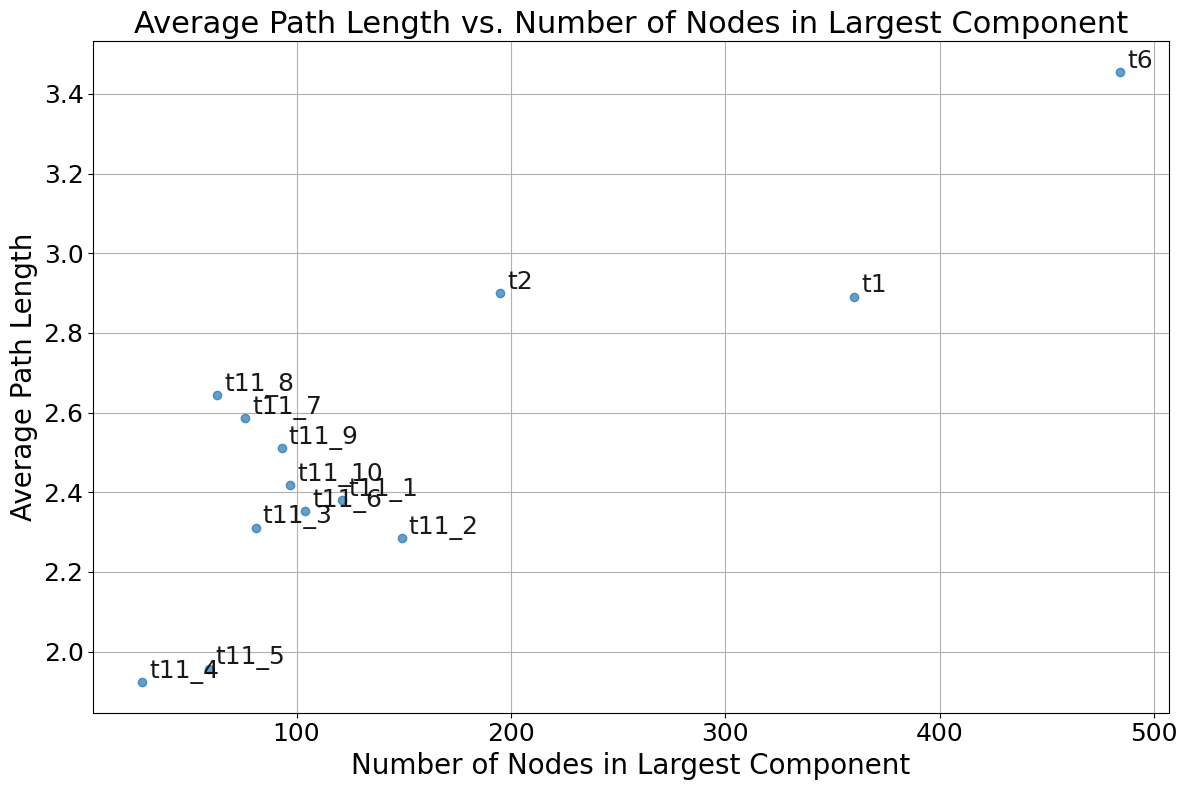

In [ ]:
import matplotlib.pyplot as plt

# Set label font size here (change this value to adjust text size)
label_fontsize = 18  # Example: double the default size

# Clean the index to just network IDs like 't1', 't11_1', etc.
apl_df_clean = apl_df.copy()
apl_df_clean.index = apl_df_clean.index.str.extract(r'dataset\\(.*)')[0]

plt.figure(figsize=(12, 8))
plt.scatter(apl_df_clean['num_nodes_in_component'], apl_df_clean['average_path_length'], alpha=0.7)
plt.title("Average Path Length vs. Number of Nodes in Largest Component", fontsize=label_fontsize + 4)
plt.xlabel("Number of Nodes in Largest Component", fontsize=label_fontsize + 2)
plt.ylabel("Average Path Length", fontsize=label_fontsize + 2)

# Annotate all points with network code only
for network_id, row in apl_df_clean.iterrows():
    plt.annotate(network_id,
                 (row['num_nodes_in_component'], row['average_path_length']),
                 textcoords="offset points",
                 xytext=(5, 3),
                 ha='left',
                 fontsize=label_fontsize,
                 alpha=0.9)

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=label_fontsize)
plt.tight_layout()
plt.show()


In [ ]:
!pip install adjustText


  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/53/1c/8feedd607cc14c5df9aef74fe3af9a99bf660743b842a9b5b1865326b4aa/adjustText-1.3.0-py3-none-any.whl.metadata


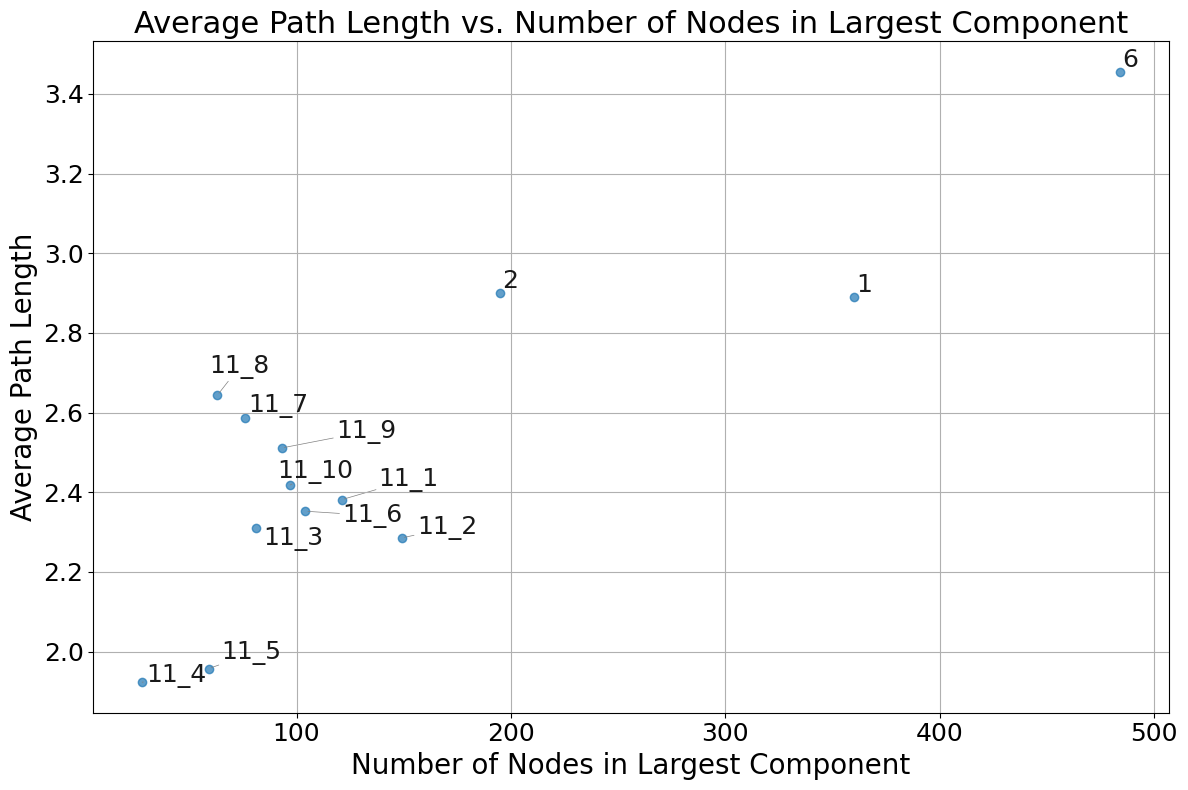

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text  # Make sure this package is installed

# Set label font size here
label_fontsize = 18

# Clean the index to just network IDs like 't1', 't11_1', etc.
apl_df_clean = apl_df.copy()
apl_df_clean.index = apl_df_clean.index.str.extract(r'dataset\\(.*)')[0]

# Remove 't' prefix for annotation labels
apl_df_clean['label'] = apl_df_clean.index.str.replace(r'^t', '', regex=True)

plt.figure(figsize=(12, 8))
plt.scatter(apl_df_clean['num_nodes_in_component'], apl_df_clean['average_path_length'], alpha=0.7)
plt.title("Average Path Length vs. Number of Nodes in Largest Component", fontsize=label_fontsize + 4)
plt.xlabel("Number of Nodes in Largest Component", fontsize=label_fontsize + 2)
plt.ylabel("Average Path Length", fontsize=label_fontsize + 2)

# Use adjustText to avoid overlapping annotations
texts = []
for i, row in apl_df_clean.iterrows():
    texts.append(
        plt.text(row['num_nodes_in_component'],
                 row['average_path_length'],
                 row['label'],
                 fontsize=label_fontsize,
                 alpha=0.9)
    )

# Automatically adjust text to avoid overlaps
adjust_text(texts, 
            only_move={'points': 'y', 'texts': 'y'},
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=label_fontsize)
plt.tight_layout()
plt.show()
